___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [8]:
#pip install -U scikit-learn

In [9]:
#pip install -U imbalanced-learn

In [10]:
#!pip install dtreeviz
#!pip install graphviz

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics

## 1. Відкрийте файл та виведіть описову статистику

In [5]:
df = pd.read_csv('loan_data.csv')
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

In [6]:
notpaid=df[df["not.fully.paid"]==1]
paid=df[df["not.fully.paid"]==0]

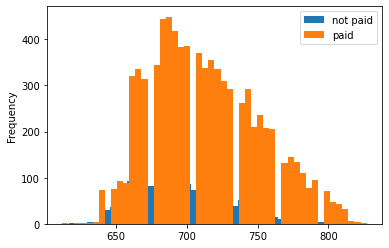

In [7]:
notpaid["fico"].plot.hist(bins=50, label='not paid')
paid["fico"].plot.hist(bins=50,label='paid')
plt.legend(loc='upper right')
plt.show()

## 3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

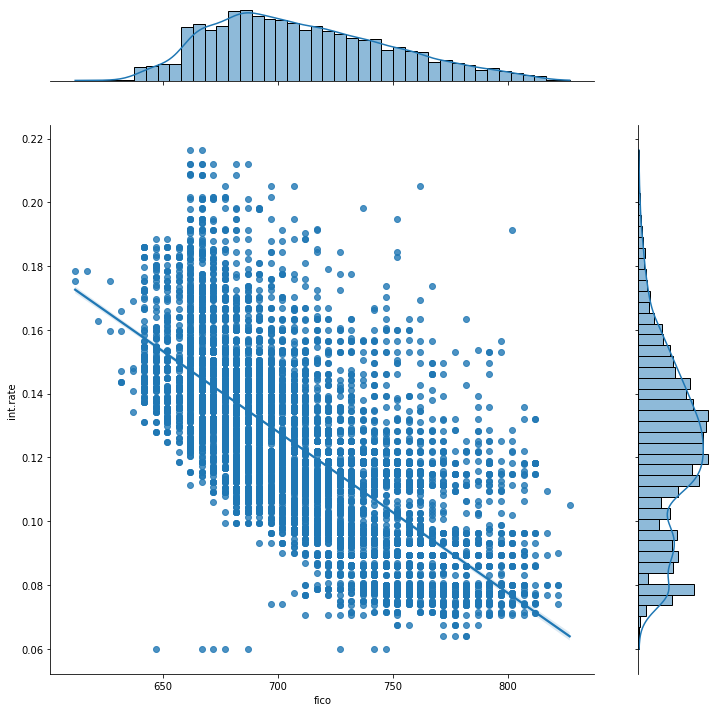

In [8]:
sns.jointplot(data=df, x="fico", y="int.rate", kind="reg",  height=10, ratio=5, space=0.6)

## 4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

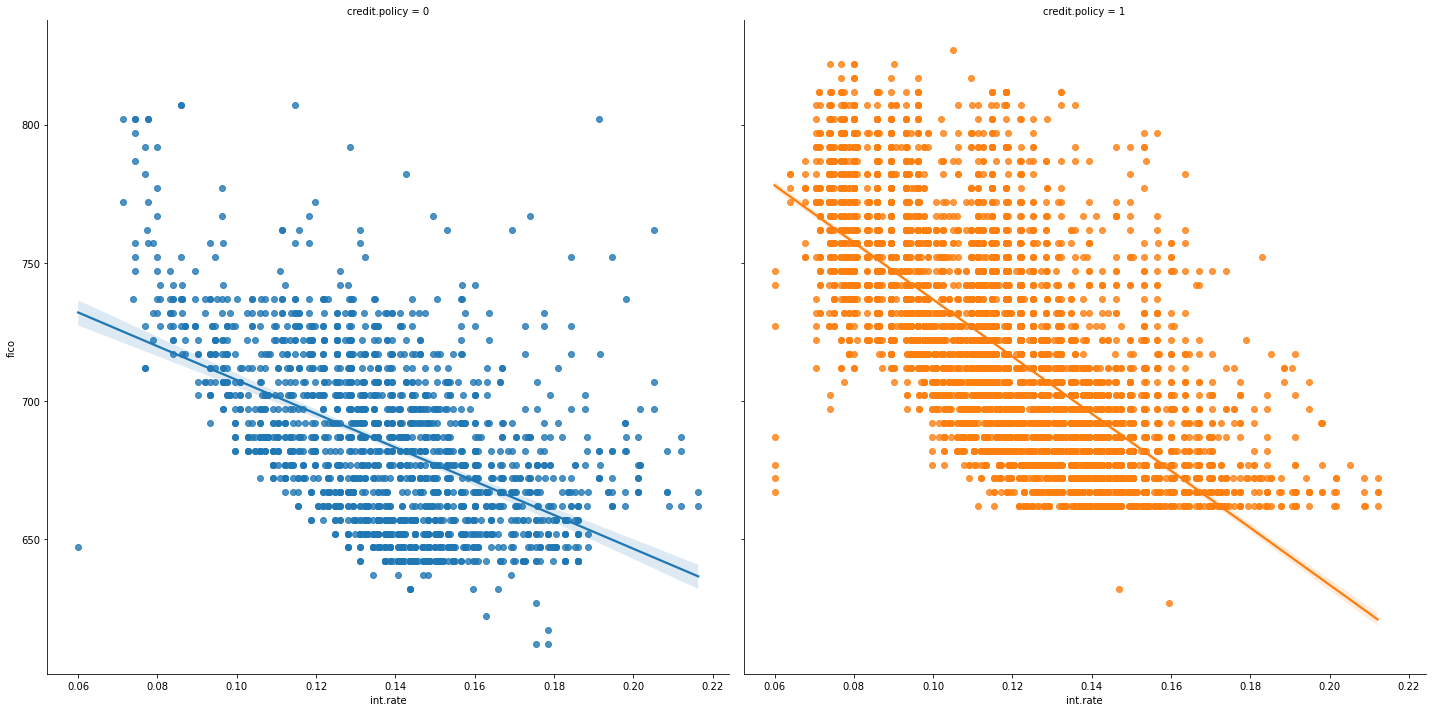

In [9]:
sns.lmplot(data=df,x='int.rate',y='fico',hue='credit.policy',col='credit.policy', height=10, aspect=1)

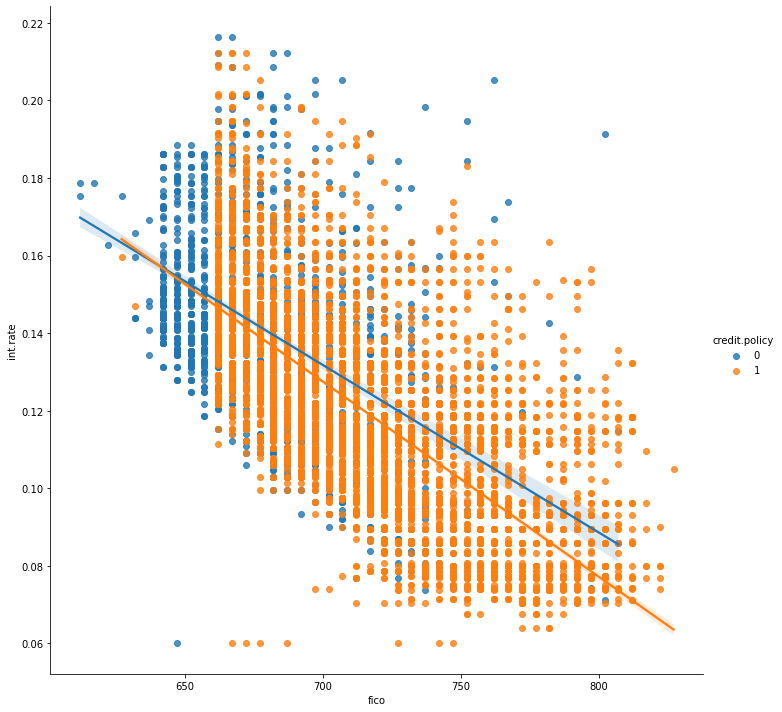

In [10]:
sns.lmplot(x="fico", y="int.rate", hue="credit.policy", data=df, height=10, aspect=1)

## 5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [11]:
df = pd.get_dummies(df, columns=['purpose'])
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


## 6. Розбийте датасет на тестві та трейнові дані

In [13]:
X = df[['int.rate','fico', 'installment','log.annual.inc', 'dti', 'revol.bal', 'revol.util', 'days.with.cr.line','not.fully.paid']]
y = df['credit.policy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
## 8. Для кожної з моделей виведіть матрицю, основні метрики
## 9. Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

дерево рішень

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [15]:
from dtreeviz.trees import *

In [17]:
td = DecisionTreeClassifier(max_depth=5)
td = td.fit(X_train,y_train)
y_pred = td.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 185  191]
 [   7 1533]]
              precision    recall  f1-score   support

           0       0.96      0.49      0.65       376
           1       0.89      1.00      0.94      1540

    accuracy                           0.90      1916
   macro avg       0.93      0.74      0.80      1916
weighted avg       0.90      0.90      0.88      1916



[Text(348.75, 391.392, 'X[1] <= 659.5\ngini = 0.313\nsamples = 7662\nvalue = [1487, 6175]'),
 Text(209.25, 304.416, 'X[1] <= 634.5\ngini = 0.01\nsamples = 379\nvalue = [377, 2]'),
 Text(139.5, 217.44, 'X[7] <= 1319.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(69.75, 130.464, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(209.25, 130.464, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 217.44, 'gini = 0.0\nsamples = 368\nvalue = [368, 0]'),
 Text(488.25, 304.416, 'X[7] <= 1109.5\ngini = 0.258\nsamples = 7283\nvalue = [1110, 6173]'),
 Text(418.5, 217.44, 'gini = 0.0\nsamples = 171\nvalue = [171, 0]'),
 Text(558.0, 217.44, 'X[5] <= 105421.0\ngini = 0.229\nsamples = 7112\nvalue = [939, 6173]'),
 Text(418.5, 130.464, 'X[4] <= 24.995\ngini = 0.206\nsamples = 6952\nvalue = [812, 6140]'),
 Text(348.75, 43.488, '\n  (...)  \n'),
 Text(488.25, 43.488, '\n  (...)  \n'),
 Text(697.5, 130.464, 'X[5] <= 149574.0\ngini = 0.327\nsamples = 160\nvalue = [127, 33]'),
 Text(627.75, 4

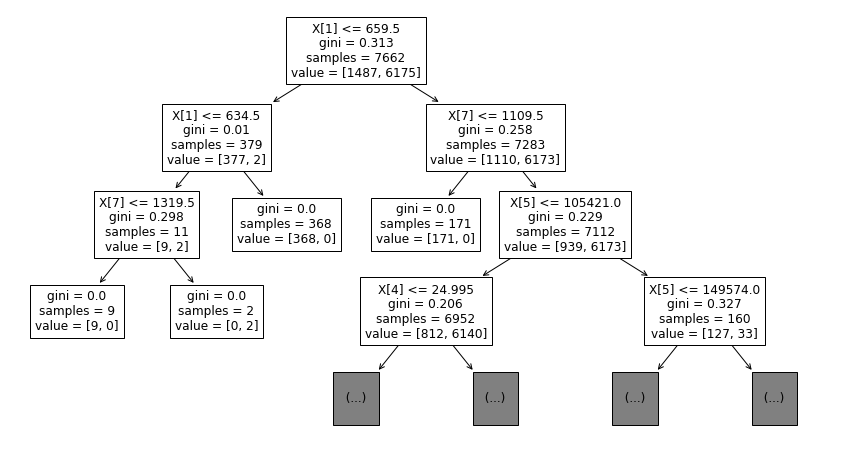

In [19]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(td.fit(X_train, y_train), max_depth=3)

логістична регресія

In [20]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
y_pred=logisticRegr.predict(X_test)
logisticRegr.score(X, y)

0.8173940279807893

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.07      0.13       381
           1       0.81      1.00      0.89      1535

    accuracy                           0.81      1916
   macro avg       0.82      0.53      0.51      1916
weighted avg       0.81      0.81      0.74      1916



random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 195  186]
 [  19 1516]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.51      0.66       381
           1       0.89      0.99      0.94      1535

    accuracy                           0.89      1916
   macro avg       0.90      0.75      0.80      1916
weighted avg       0.89      0.89      0.88      1916

Accuracy: 0.8930062630480167


XGBoost

In [31]:
#pip install xgboost

In [32]:
from xgboost import XGBClassifier

In [33]:
XGBr = XGBClassifier()
XGBr.fit(X_train,y_train)
y_pred_XGBr = XGBr.predict(X_test)

C:\Users\Magnolia\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
XGBr.score(X_train,y_train)

0.9727225267554164

In [35]:
XGBr.score(X_test, y_test)

0.8930062630480167

## 10. Використайте ансамбель voting для всіх моделей

In [36]:
from sklearn.ensemble import VotingClassifier
models = [('td', DecisionTreeClassifier(max_depth=5)), ('logisticRegr',LogisticRegression()),('classifier', RandomForestClassifier(n_estimators = 100))]
ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X_train, y_train)
predictions = ensemble.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))


[[ 186  195]
 [   2 1533]]
              precision    recall  f1-score   support

           0       0.99      0.49      0.65       381
           1       0.89      1.00      0.94      1535

    accuracy                           0.90      1916
   macro avg       0.94      0.74      0.80      1916
weighted avg       0.91      0.90      0.88      1916



In [38]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print("Voting Score % d" % score)

Voting Score  0


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [75]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [76]:
import requests
import pandas as pd

In [77]:
r = requests.get(url)

In [78]:
data = pd.read_csv(url)
data.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


**1. Виведіть список унікальних міст з датасету**

In [79]:
data['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

**2. Виведіть дату початку та кінця ведення даних**

In [80]:
data.dtypes

city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [81]:
data["date.utc"] = pd.to_datetime(data["date.utc"])

In [82]:
data.dtypes

city                      object
country                   object
date.utc     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
dtype: object

In [83]:
data["date.utc"].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [84]:
data["date.utc"].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

**3. Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю)?**

In [85]:
data['day_of_week'] = data["date.utc"].dt.dayofweek

In [86]:
data.head()

,city,country,date.utc,location,parameter,value,unit,day_of_week
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,3


In [88]:
data.groupby(['day_of_week', 'city']).mean()

value
day_of_week city                
0           Antwerpen  27.875000
            London     23.969697
            Paris      24.856250
1           Antwerpen  22.214286
            London     24.885714
            Paris      30.999359
2           Antwerpen  21.125000
            London     23.460432
            Paris      29.165753
3           Antwerpen  27.500000
            London     24.780142
            Paris      28.600690
4           Antwerpen  28.400000
            London     26.446809
            Paris      31.617986
5           Antwerpen  33.500000
            London     24.977612
            Paris      25.266154
6           Antwerpen  21.896552
            London     24.859155
            Paris      23.274306

**4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?**

In [89]:
data['hour'] = data['date.utc'].dt.hour

In [90]:
data.head()

,city,country,date.utc,location,parameter,value,unit,day_of_week,hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,4,0
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,3,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,3,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,3,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,3,20


In [91]:
df = data.groupby('hour').mean()
df

,value,day_of_week
hour,,
0,27.955294,3.023529
1,26.125688,2.908257
2,23.558511,2.893617
3,23.242683,2.804878
4,22.979518,2.831325
5,27.070732,2.853659
6,30.635632,2.942529
7,31.346591,2.943182
8,29.138636,2.943182


Text(0, 0.5, 'value')

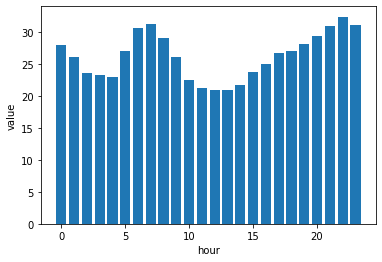

In [92]:
import matplotlib as plt
x = df.index
y = df['value']
fig, ax = plt.pyplot.subplots()
ax.bar(x,y)
ax.set_xlabel('hour')
ax.set_ylabel('value')

<AxesSubplot:xlabel='day_of_week'>

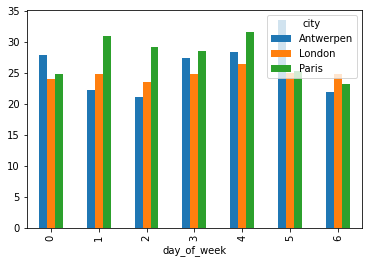

In [98]:
data.groupby(['city', 'day_of_week'])['value'].mean().unstack(level=0).plot.bar(stacked=False)